In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import networkx as nx

from src.utils.utils_networks import network_years_generator, average_degree, global_efficiency

In [3]:
df_financial = pd.DataFrame({'efficiency':[global_efficiency(g) for g in network_years_generator(output_filepath, 'A_country')], 
                   'average_degree':[average_degree(g) for g in network_years_generator(output_filepath, 'A_country')], 
                   'assortativity_coefficient':[nx.degree_pearson_correlation_coefficient(g, weight='weight') for g in network_years_generator(output_filepath, 'A_country')], 
                   'average_clustering':[nx.average_clustering(g,  weight='weight') for g in network_years_generator(output_filepath, 'A_country')],                   
                   }, index=range(2005, 2016))
df_financial = df_financial.apply(lambda x:(x - x.mean())/x.std())
df_financial['network'] = 'Financial network'

df_migration = pd.DataFrame({'efficiency':[global_efficiency(g) for g in network_years_generator(output_filepath, 'migration_network')], 
                   'average_degree':[average_degree(g) for g in network_years_generator(output_filepath, 'migration_network')], 
                   'assortativity_coefficient':[nx.degree_pearson_correlation_coefficient(g, weight='weight') for g in network_years_generator(output_filepath, 'migration_network')], 
                   'average_clustering':[nx.average_clustering(g,  weight='weight') for g in network_years_generator(output_filepath, 'migration_network')],                   
                   }, index=range(2005, 2016))
df_migration = df_migration.apply(lambda x: (x - x.mean())/x.std())
df_migration['network'] = 'Migration network'

In [4]:
df = pd.concat([df_financial, df_migration], axis=0)
df = df.reset_index().set_index(['index', 'network']).stack().reset_index()
df.columns = ['year', 'network', 'statistic', 'value'] 

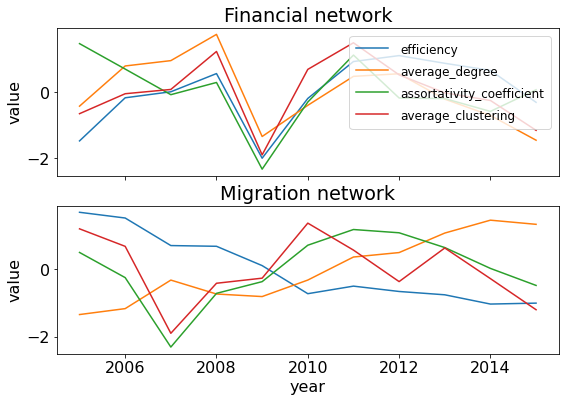

In [9]:
import seaborn as sns
plt.rcParams.update({'font.size': 16})

fig, (ax1, ax2)  = plt.subplots(2, 1, figsize = (9,6), sharex=True)

sns.lineplot(data=df[df.network=='Financial network'], x="year", y="value", hue="statistic", ax=ax1)
ax1.legend(loc='upper right')
ax1.title.set_text('Financial network')
plt.setp(ax1.get_legend().get_texts(), fontsize='12') # for legend text

sns.lineplot(data=df[df.network=='Migration network'], x="year", y="value", hue="statistic", ax=ax2)
ax2.get_legend().remove()
ax2.title.set_text('Migration network')

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'network_descriptions.png')
plt.savefig(save_to)     

plt.show()